In [1]:
import os 
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [19]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using {} device'.format(device))

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 8
batch_size = 100
learning_rate = 0.001

Using cpu device


In [20]:
# Prepare datasets
train_dataset = torchvision.datasets.FashionMNIST(root='data',
                                                 train=True,
                                                 transform=transforms.ToTensor(),
                                                 download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="data",
                                                train=False,
                                                transform=transforms.ToTensor())

# Dataloader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [4]:
import matplotlib.pyplot as plt

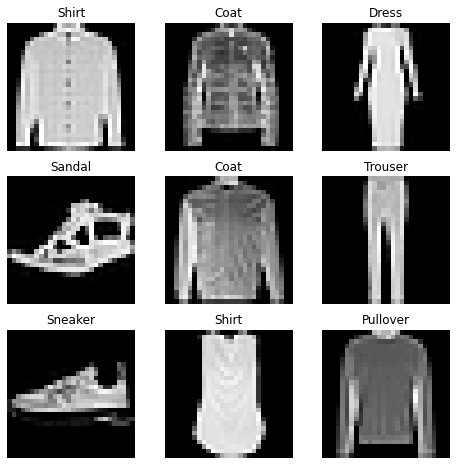

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
from torchsummary import summary

In [21]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
            
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
summary(model, input_size=(1, 1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1, 500]         392,500
              ReLU-2            [-1, 1, 1, 500]               0
            Linear-3             [-1, 1, 1, 10]           5,010
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.52
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


In [22]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
# Train 
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) %100 == 0:
            print('Epoch [{}/{}]\t Step: [{}/{}]\t Loss: {:.4f}'.
                 format((epoch+1), num_epochs, i+1, total_steps, loss.item()))
            train_loss.append(loss.item())

Epoch [1/8]	 Step: [100/600]	 Loss: 0.5643
Epoch [1/8]	 Step: [200/600]	 Loss: 0.4500
Epoch [1/8]	 Step: [300/600]	 Loss: 0.4111
Epoch [1/8]	 Step: [400/600]	 Loss: 0.3297
Epoch [1/8]	 Step: [500/600]	 Loss: 0.4366
Epoch [1/8]	 Step: [600/600]	 Loss: 0.5234
Epoch [2/8]	 Step: [100/600]	 Loss: 0.5589
Epoch [2/8]	 Step: [200/600]	 Loss: 0.3584
Epoch [2/8]	 Step: [300/600]	 Loss: 0.3050
Epoch [2/8]	 Step: [400/600]	 Loss: 0.2254
Epoch [2/8]	 Step: [500/600]	 Loss: 0.4721
Epoch [2/8]	 Step: [600/600]	 Loss: 0.3762
Epoch [3/8]	 Step: [100/600]	 Loss: 0.2040
Epoch [3/8]	 Step: [200/600]	 Loss: 0.2916
Epoch [3/8]	 Step: [300/600]	 Loss: 0.3269
Epoch [3/8]	 Step: [400/600]	 Loss: 0.3345
Epoch [3/8]	 Step: [500/600]	 Loss: 0.2561
Epoch [3/8]	 Step: [600/600]	 Loss: 0.2947
Epoch [4/8]	 Step: [100/600]	 Loss: 0.2496
Epoch [4/8]	 Step: [200/600]	 Loss: 0.2604
Epoch [4/8]	 Step: [300/600]	 Loss: 0.4631
Epoch [4/8]	 Step: [400/600]	 Loss: 0.2849
Epoch [4/8]	 Step: [500/600]	 Loss: 0.3834
Epoch [4/8]

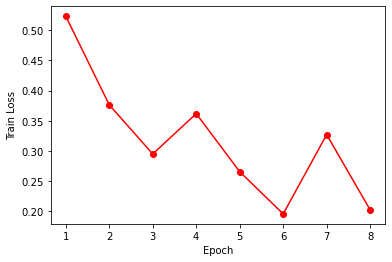

In [32]:
plt.plot([epoch for epoch in range(1,9)], train_loss[5:48:6], 'ro-')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

In [35]:
#test
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
    print(f'Accuracy: {(correct/total)*100}')
torch.save(model.state_dict(), 'fashion_mnist.pth')

Accuracy: 88.12
